In [ ]:
# Brownian v2 and v3 in this file. v2 is just for archival purpose. Use v3 for multiprocessing.

array([ 1.9718158 ,  3.49115922,  4.9878215 ,  0.80417571,  3.9115145 ,
        0.52095817,  4.74196127, -0.05558982,  0.55561952,  5.34577035])

In [25]:
import random, matplotlib.pyplot as plt, time, math, multiprocessing, concurrent.futures
import numpy as np

#plt.style.use(['science'])

def flatten(xss):
    return [x for xs in xss for x in xs]

peakmax=np.arcsin(-Radius_of_circle*drift/potential_constant)


gamma,Radius_of_circle=1,1
sigma,drift,potential_constant,time2=0.8,0.3,1,1000

ram0=1024
def brownian_v3(iterations):
    #gamma=1.380649*(10**(-23))*300/diffusion
    pos=np.zeros((iterations,ram0))
    cur=np.zeros((iterations,ram0))
    A=np.zeros(ram0)
    B=np.zeros(ram0)
    C=[sigma, drift, potential_constant, iterations,time2]
    intial_pos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi
    #intial_pos=1.0
    theta0=np.full(ram0,intial_pos) 
    #use above theta0 for f<V0. For f>V0, use below theta0
    #theta0=np.pi/2
    theta=np.full(ram0,theta0)
    theta2=np.zeros(ram0)
    dt=0.1 #time increment
    T=int(time2/dt) #Total time
    std=np.sqrt(dt*sigma)
    
    prefactor=1/(gamma*Radius_of_circle)
    for n in range(iterations):
        #D=np.zeros(T)
        #D[0]=intial_pos
        
        for i in range(T):
            #D[i]=theta[0]-theta0[0]
            theta+=prefactor*(np.random.normal(0,std, ram0)+(drift-potential_constant*(-np.sin(theta))/Radius_of_circle)*dt)
            
        theta2=theta-np.floor((theta-np.pi)/(2*np.pi))*2*np.pi-2*np.pi
        
        theta+=np.random.uniform(peakmax,peakmax+2*np.pi,ram0)
        
        pos[n]=theta2
        cur[n]=Radius_of_circle*(theta-theta0)/time2
        
        theta=np.full(ram0,theta0)

    pos=pos.flatten()
    cur=cur.flatten()


    return pos,cur #D

if __name__ == "__main__":
    iterations=10**3
    
    with concurrent.futures.ProcessPoolExecutor() as executor:
        start_time = time.perf_counter()
        temp = list(executor.map(brownian_v3, [10 for i in range(int(iterations/10))]))
        finish_time = time.perf_counter()
    print(f"Program finished in {finish_time-start_time} seconds")
    

results = [[temp[j][i] for j in range(len(temp))] for i in range(len(temp[0]))]
pos = flatten(results[0])
cur = flatten(results[1])

print(len(cur))


Program finished in 60.903297232000114 seconds
1024000


In [72]:
np.sqrt(0.1*sigma)

0.024494897427831782

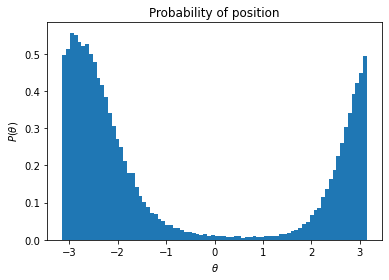

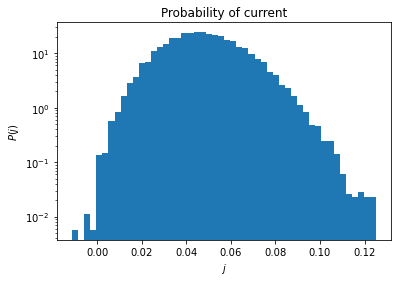

In [26]:
fig1 = plt.figure(1)
plt.hist(pos, bins=80, density=True)
plt.title('Probability of position')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

bins_manual=[]
for i in range(-15,30):
    bins_manual.append((2*np.pi*i-np.pi)/time2)   #data[2][4] is time

fig2 = plt.figure(2)
plt.hist(cur, bins=50, density=True)
#plt.hist(cur, bins=bins_manual,density=True)
plt.title('Probability of current')
plt.xlabel('$j$')
plt.ylabel('$P(j)$')
plt.yscale('log')

plt.show()

In [27]:
pj=np.histogram(cur, bins=50, density=True)[0]
pjx=np.histogram(cur, bins=50, density=True)[1]
pjj=[]
pjjx=[]
for i in range(len(pj)-1):
    if pj[i]!=0:
        pjj.append(pj[i])
        pjjx.append((pjx[i+1]+pjx[i])/2)
pj2=(-1/time2)*np.log(pjj)

Area2=0
for i in range(len(pjjx)):
    Area2+=pjj[i]

Area=np.sum(pj)*(pjx[2]-pjx[1])
    
#Don't divide by area or area2. Useless


pj2=(-1/time2)*np.log(pjj)

In [160]:
Area

1.000000000000001

<function matplotlib.pyplot.show(close=None, block=None)>

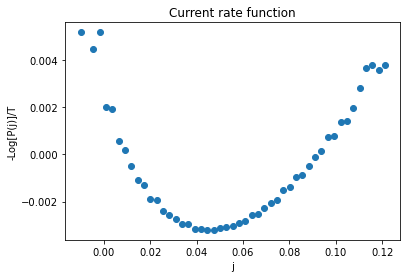

In [28]:
plt.scatter(pjjx,pj2)
plt.title('Current rate function')
plt.xlabel('j')
plt.ylabel('-Log[P(j)]/T')

plt.show

In [210]:
min(cur)

-0.02510343640535555

In [55]:
import numpy as np
import random, matplotlib.pyplot as plt, time, math

gamma,Radius_of_circle=1,1

ram0=1024

def brownian_v2(sigma,drift,potential_constant,iterations,time):
    #gamma=1.380649*(10**(-23))*300/diffusion
    pos=np.zeros((iterations,ram0))
    cur=np.zeros((iterations,ram0))
    A=np.zeros(ram0)
    B=np.zeros(ram0)
    C=[sigma, drift, potential_constant, iterations,time]
    intial_pos=-np.arcsin(-Radius_of_circle*drift/potential_constant)+np.pi
    theta0=np.full(ram0,intial_pos) 
    #use above theta0 for f<V0. For f>V0, use below theta0
    #theta0=np.pi/2
    theta=np.full(ram0,theta0)
    theta2=np.zeros(ram0)
    dt=0.1 #time increment
    T=int(time/dt) #Total time
    std=np.sqrt(dt*sigma)
    prefactor=1/(gamma*Radius_of_circle)
    for n in range(iterations):
        #D=np.zeros(T)
        #D[0]=intial_pos
        
        for i in range(T):
            #D[i]=theta[0]-theta0[0]
            theta+=prefactor*(np.random.normal(0,std, ram0)+(drift-potential_constant*(np.sin(theta))/Radius_of_circle)*dt)
            
        for k in range(len(theta)):
            if -np.pi<theta[k]<=np.pi:
                theta2[k]=theta[k]
            else:
                theta2[k]=-np.sign(theta[k])*np.pi+theta[k]-np.pi-int((theta[k]-np.pi)/(2*np.pi))*2*np.pi   
        pos[n]=theta2
        cur[n]=Radius_of_circle*(theta-theta0)/time
        
        theta=np.full(ram0,theta0)

    pos=pos.flatten()
    cur=cur.flatten()
    
    return pos,cur,C,#D

In [104]:
t1=time.perf_counter()
data=brownian_v2(0.3,0.1,1,256,3)
print(time.perf_counter()-t1)

0.5873084320046473


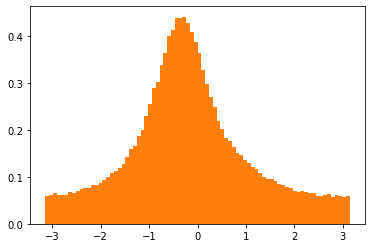

In [105]:
qj=plt.hist(data[0], bins=80, density=True)[0]
qjx=plt.hist(data[0], bins=80, density=True)[1]
qjj=[]
qjjx=[]
for i in range(len(qj)-1):
    if qj[i]!=0:
        qjj.append(qj[i])
        qjjx.append((qjx[i+1]+qjx[i])/2
qj2=(-1e-1)*np.log(qjj)

<function matplotlib.pyplot.show(close=None, block=None)>

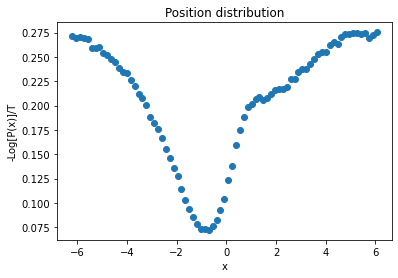

In [101]:
jupyter nbextension enable codefolding/mainplt.scatter(qjjx,qj2)
plt.title('Position distribution')
plt.xlabel('x')
plt.ylabel('-Log[P(x)]/T')

plt.show

In [25]:
min(cur)

-0.23849806549897842

In [9]:
print(len(bins_manual))

20


In [58]:
-np.arcsin(-Radius_of_circle*0.1/1)+np.pi

3.241760074751353

In [2]:
pj=plt.hist(cur, bins=bins_manual, density=True)[0]

NameError: name 'plt' is not defined